# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
%matplotlib inline

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


In [3]:
churn.describe()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
count,46206.000000,46206.000000,46206.000000,46130.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,28416.000000,28416.000000,28416.000000
mean,42335.196879,45.874627,1.555707,41.411836,50.318617,51.364858,10.846708,8.237112,20.349825,15.249968,0.385015,75.188029,0.014640,0.191125,0.007038
std,22100.432751,33.077927,0.835529,15.263726,51.925537,20.855419,9.769887,8.341476,8.034631,10.982958,0.486604,73.519041,0.120108,0.393194,0.083600
min,1.000000,0.000000,1.000000,-4.000000,0.000000,8.180000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,0.000000,0.000000,0.000000
25%,24951.750000,14.000000,1.000000,28.000000,11.000000,36.360000,3.000000,0.000000,24.000000,0.000000,0.000000,36.360000,0.000000,0.000000,0.000000
50%,43261.000000,44.000000,1.000000,40.000000,35.000000,54.540000,8.000000,7.000000,24.000000,24.000000,0.000000,54.540000,0.000000,0.000000,0.000000
75%,61132.750000,77.000000,2.000000,52.000000,69.000000,72.720000,16.000000,16.000000,24.000000,24.000000,1.000000,84.530000,0.000000,0.000000,0.000000
max,79500.000000,120.000000,4.000000,116.000000,259.000000,234.540000,147.000000,24.000000,36.000000,36.000000,1.000000,1965.890000,1.000000,1.000000,1.000000


In [4]:
churn.shape

(46206, 21)

In [5]:
set(churn['CHURN_IND'])

{0, 1}

In [6]:
churn['CHURN_IND'].value_counts()

0    28416
1    17790
Name: CHURN_IND, dtype: int64

In [7]:
churn.isna().sum()

CUST_ID                             0
ACCOUNT_TENURE                      0
ACCT_CNT_SERVICES                   0
AGE                                76
CFU                                 0
SERVICE_TENURE                      0
PLAN_ACCESS_FEE                     0
BYO_PLAN_STATUS                     0
PLAN_TENURE                         0
MONTHS_OF_CONTRACT_REMAINING        0
LAST_FX_CONTRACT_DURATION           0
CONTRACT_STATUS                     0
PREV_CONTRACT_DURATION              0
HANDSET_USED_BRAND                  0
CHURN_IND                           0
MONTHLY_SPEND                       0
COUNTRY_METRO_REGION                1
STATE                               1
RECON_SMS_NEXT_MTH              17790
RECON_TELE_NEXT_MTH             17790
RECON_EMAIL_NEXT_MTH            17790
dtype: int64

In [8]:
churn.drop(['CUST_ID', 'RECON_SMS_NEXT_MTH', 'RECON_TELE_NEXT_MTH', 'RECON_EMAIL_NEXT_MTH'], axis=1, inplace=True)

In [9]:
churn.dropna(axis=0, inplace=True)
churn.shape

(46129, 17)

In [10]:
churn.isna().sum()

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
CFU                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            0
STATE                           0
dtype: int64

In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46129 entries, 1 to 46206
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ACCOUNT_TENURE                46129 non-null  int64  
 1   ACCT_CNT_SERVICES             46129 non-null  int64  
 2   AGE                           46129 non-null  float64
 3   CFU                           46129 non-null  object 
 4   SERVICE_TENURE                46129 non-null  int64  
 5   PLAN_ACCESS_FEE               46129 non-null  float64
 6   BYO_PLAN_STATUS               46129 non-null  object 
 7   PLAN_TENURE                   46129 non-null  int64  
 8   MONTHS_OF_CONTRACT_REMAINING  46129 non-null  int64  
 9   LAST_FX_CONTRACT_DURATION     46129 non-null  int64  
 10  CONTRACT_STATUS               46129 non-null  object 
 11  PREV_CONTRACT_DURATION        46129 non-null  int64  
 12  HANDSET_USED_BRAND            46129 non-null  object 
 13  C

In [12]:
catagorical_feat = churn.select_dtypes(include=['object']).columns.tolist()
print('Number of catagorical features: ', len(catagorical_feat))
print('Features: ' ,catagorical_feat)

Number of catagorical features:  6
Features:  ['CFU', 'BYO_PLAN_STATUS', 'CONTRACT_STATUS', 'HANDSET_USED_BRAND', 'COUNTRY_METRO_REGION', 'STATE']


In [13]:
for feat in catagorical_feat:
    value = len(churn[feat].unique())
    print('Cardinality of {} are: {}'.format(feat, value))

Cardinality of CFU are: 2
Cardinality of BYO_PLAN_STATUS are: 2
Cardinality of CONTRACT_STATUS are: 3
Cardinality of HANDSET_USED_BRAND are: 6
Cardinality of COUNTRY_METRO_REGION are: 2
Cardinality of STATE are: 8


In [14]:
def encodeData(feat):
        map_dict = {}
        values = list(churn[feat].unique())
        for i in range(len(values)):
            map_dict[values[i]] = i
        return map_dict

for feat in catagorical_feat:
    churn[feat].replace(encodeData(feat), inplace=True)

In [15]:
for feat in catagorical_feat:
    value = len(churn[feat].unique())
    print('Cardinality of {} are: {}'.format(feat, value))

Cardinality of CFU are: 2
Cardinality of BYO_PLAN_STATUS are: 2
Cardinality of CONTRACT_STATUS are: 3
Cardinality of HANDSET_USED_BRAND are: 6
Cardinality of COUNTRY_METRO_REGION are: 2
Cardinality of STATE are: 8


In [16]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46129 entries, 1 to 46206
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ACCOUNT_TENURE                46129 non-null  int64  
 1   ACCT_CNT_SERVICES             46129 non-null  int64  
 2   AGE                           46129 non-null  float64
 3   CFU                           46129 non-null  int64  
 4   SERVICE_TENURE                46129 non-null  int64  
 5   PLAN_ACCESS_FEE               46129 non-null  float64
 6   BYO_PLAN_STATUS               46129 non-null  int64  
 7   PLAN_TENURE                   46129 non-null  int64  
 8   MONTHS_OF_CONTRACT_REMAINING  46129 non-null  int64  
 9   LAST_FX_CONTRACT_DURATION     46129 non-null  int64  
 10  CONTRACT_STATUS               46129 non-null  int64  
 11  PREV_CONTRACT_DURATION        46129 non-null  int64  
 12  HANDSET_USED_BRAND            46129 non-null  int64  
 13  C

In [17]:
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,0,46,54.54,0,15,0,24,0,24,0,1,61.40,0,0
2,60,3,55.0,0,59,54.54,0,5,0,24,0,24,1,1,54.54,1,1
3,65,1,29.0,0,65,40.90,1,15,0,12,0,12,1,1,2.50,0,0
4,31,1,51.0,0,31,31.81,0,31,0,24,0,24,1,1,6.48,0,2
5,95,1,31.0,0,95,54.54,0,0,0,24,0,24,1,1,100.22,1,1


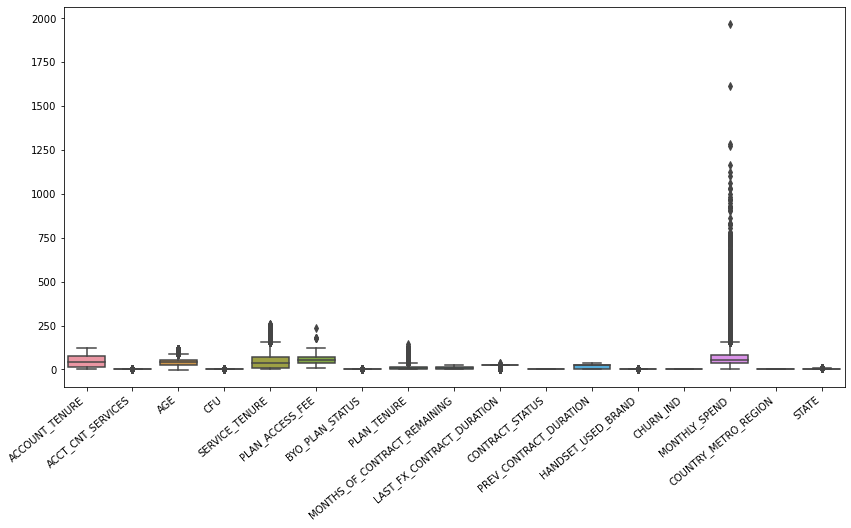

In [18]:
plt.figure(figsize=(14, 7))
ax = sns.boxplot(data=churn)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

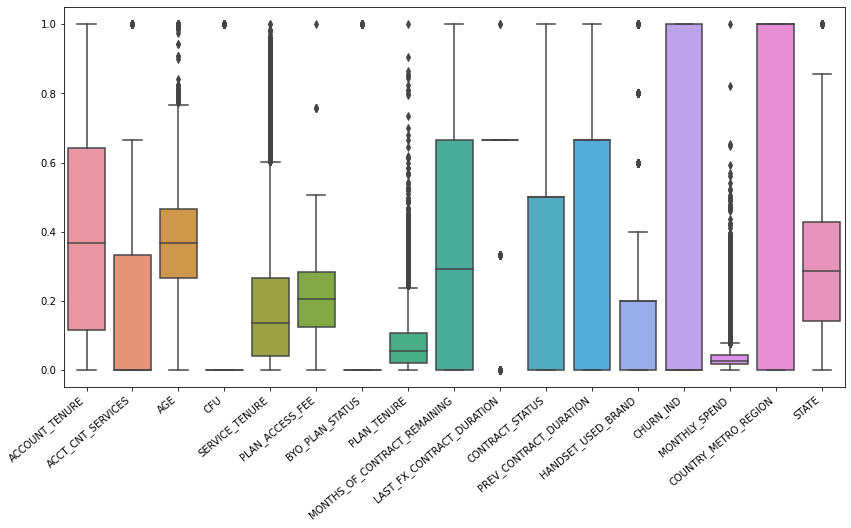

In [19]:
#scaled data frame boxplot 
plt.figure(figsize = (14, 7))
df_scaled = MinMaxScaler()
churn = pd.DataFrame(df_scaled.fit_transform(churn), index=churn.index, columns=churn.columns)
ax = sns.boxplot(data = churn)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [20]:
all_X = churn.drop(['CHURN_IND'], axis=1)
all_y = churn['CHURN_IND']
train, test = train_test_split(churn, test_size=0.2, random_state=42)
X_train = train.drop(['CHURN_IND'], axis=1)
y_train = train['CHURN_IND']
X_test = test.drop(['CHURN_IND'], axis=1)
y_test = test['CHURN_IND']

In [21]:
print(train.shape)
print(test.shape)

(36903, 17)
(9226, 17)


In [22]:
train_acc = []
test_acc = []

for i in range(X_train.shape[1]):
    lr = LogisticRegression(max_iter=1000)
    rfe = RFE(estimator=lr, n_features_to_select=i+1, step=1)
    rfe.fit(X_train, y_train)
    train_preds = rfe.predict(X_train)
    test_preds = rfe.predict(X_test)
    train_acc.append(accuracy_score(y_train, train_preds))
    test_acc.append(accuracy_score(y_test, test_preds))

Text(0.5, 1.0, 'Accuracy at Each Number of Features using RFE')

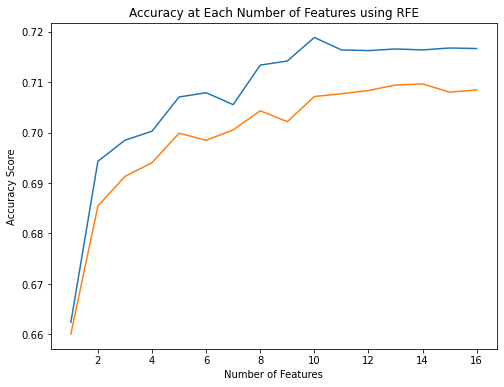

In [23]:
plt.figure(figsize=(8,6))
plt.plot(range(1, X_train.shape[1] + 1), train_acc)
plt.plot(range(1, X_train.shape[1] + 1), test_acc)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score")
plt.title("Accuracy at Each Number of Features using RFE")

In [24]:
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=12, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=12)

In [25]:
train_preds = rfe.predict(X_train)
test_preds = rfe.predict(X_test)
print("Train accuracy:")
print(accuracy_score(y_train, train_preds))
print("Test accuracy:")
print(accuracy_score(y_test, test_preds))

Train accuracy:
0.7162290328699563
Test accuracy:
0.7083243008887925


In [26]:
X_train.columns[rfe.support_]

Index(['ACCOUNT_TENURE', 'AGE', 'SERVICE_TENURE', 'PLAN_ACCESS_FEE',
       'BYO_PLAN_STATUS', 'PLAN_TENURE', 'MONTHS_OF_CONTRACT_REMAINING',
       'LAST_FX_CONTRACT_DURATION', 'CONTRACT_STATUS',
       'PREV_CONTRACT_DURATION', 'MONTHLY_SPEND', 'COUNTRY_METRO_REGION'],
      dtype='object')

In [27]:
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

Train Confusion Matrix:
[[18864  3825]
 [ 6647  7567]]
Test Confusion Matrix:
[[4680  997]
 [1694 1855]]
